# Analysing the SuperStore Data by Using SQL and Python

### Abstract:
**Data analysis on the Super Store Data by using Pandas and SQL. This Data Analysis is focused upon Sales and Profits in different Regions and Categories. Analysis of Data is shown in graphs with help of Seaborn an matplotlib visualization Libraries.**

### Describing the Data
**There are 7 tables in the database sales**
1. **Sales** : Sales shows Profit, Quantity,Discount and Sales. It also has Product ID and Order ID
2. **Customers** : Customers involves Customer name, Segment,Customer ID
3. **Regions** : Regions comprises Customer ID, Order ID, Country, City, State, Postal Code, Region
4. **Order Details** : Order Details shows Order ID, Order Date, Ship Date, Ship Mode
5. **Products** : Products includes Product ID, Category, Sub-Category, Product Name
6. **People** : People has 2 columns Person(Managers) and Region
7. **Returns** : Returns shows Returned and Order ID

### Importing Important Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings 
warnings.filterwarnings("ignore")

### Making Connection Between SQL and Python

In [4]:
import mysql.connector
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="1505"
)

print(mydb)

mycursor = mydb.cursor()

#mycursor.execute("CREATE DATABASE mydatabase")
mycursor = mydb.cursor()

mycursor.execute("SHOW DATABASES")

for x in mycursor:
    print(x)

('bank',)
('classicmodels',)
('datasets',)
('imarticus',)
('information_schema',)
('mydatabase',)
('mysql',)
('performance_schema',)
('pga27',)
('practice',)
('sakila',)
('sales',)
('sample',)
('sys',)
('world',)


### Selection Of Database

In [5]:
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="1505",
  database="sales"
)

In [6]:
mycursor = mydb.cursor()
mycursor.execute("USE sales")

### Creating DataFrames from SQL Tables.

In [7]:
sql_query1=pd.read_sql_query('select * from orders', mydb )

Orders = pd.DataFrame(sql_query1, columns= ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'])
Orders

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x...",29.6000,4,0.00,13.3200


In [8]:
sql_query2 = pd.read_sql_query('SELECT * FROM returns', mydb)
                            
returns = pd.DataFrame(sql_query2, columns = ['Returned', 'Order ID'])
returns

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [9]:
sql_query3 = pd.read_sql_query('SELECT * FROM people', mydb)
                            
people = pd.DataFrame(sql_query3, columns = ['Person', 'Region'])
people

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


## Analysis of Data

###  1. Monthly Sales

In [10]:
query1 = "SELECT MONTH(`Order date`) AS Month,round(SUM(Sales),2) AS Total_Sales FROM Orders GROUP BY  MONTH(`Order date`)"
mycursor.execute(query1)
myresult=mycursor.fetchall()
for x in myresult:
    print (x)

(11, 352461.07)
(6, 152718.68)
(10, 200322.98)
(4, 137762.13)
(12, 325293.5)
(5, 155028.81)
(8, 159044.06)
(7, 147238.1)
(9, 307649.95)
(1, 94924.84)
(3, 205005.49)
(2, 59751.25)


In [11]:
query1=pd.DataFrame(myresult,columns=['Month','Sales'])
query1

,Month,Sales
0,11,352461.07
1,6,152718.68
2,10,200322.98
3,4,137762.13
4,12,325293.50
5,5,155028.81
6,8,159044.06
7,7,147238.10
8,9,307649.95
9,1,94924.84


<Axes: xlabel='Month', ylabel='Sales'>

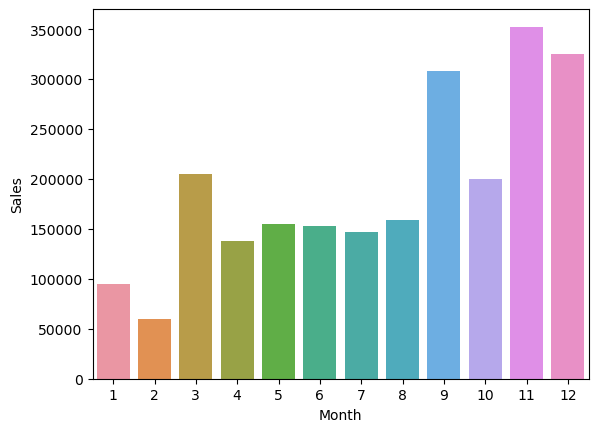

In [12]:
import seaborn as sns
sns.barplot(x="Month",y="Sales",data=query1,errorbar=('ci', 0))

#### INSIGHTS :
In November and December, the majority of sales occur, while February typically sees the lowest sales figures. Monthly Sales analysis helps in understanding seasonal patterns and to plan inventory level.
Recognizing this trend, it's advantageous to stock more products in peak months and implement marketing strategies or special offers to boost sales during slower months. 

### 2. Monthly Profits

In [13]:
query2 = "Select month(`order date`) as month,round(sum(profit),2) from orders group by month"
mycursor.execute(query2)
myresult=mycursor.fetchall()
for x in myresult:
    print(x)

(11, 35468.43)
(6, 21285.8)
(10, 31784.04)
(4, 11587.44)
(12, 43369.19)
(5, 22411.31)
(8, 21776.94)
(7, 13832.66)
(9, 36857.48)
(1, 9134.45)
(3, 28594.69)
(2, 10294.61)


In [14]:
query2=pd.DataFrame(myresult,columns=['Month','Profits'])
query2

,Month,Profits
0,11,35468.43
1,6,21285.80
2,10,31784.04
3,4,11587.44
4,12,43369.19
5,5,22411.31
6,8,21776.94
7,7,13832.66
8,9,36857.48
9,1,9134.45


<Axes: xlabel='Month', ylabel='Profits'>

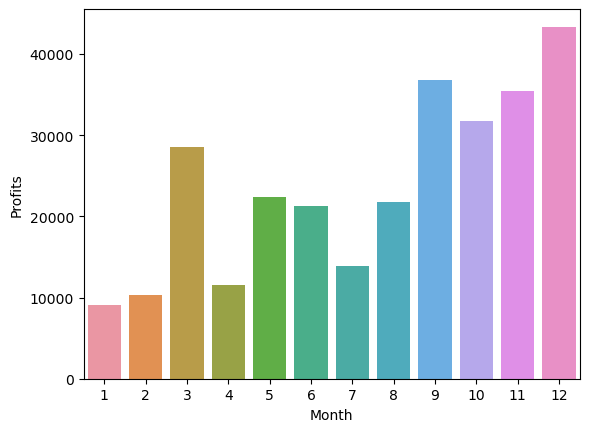

In [15]:
sns.barplot(x=query2['Month'],y=query2['Profits'],data=query2,errorbar=('ci',0))

#### INSIGHTS :
It's evident that profits are highest in December, closely followed by September. Interestingly, despite November having the highest sales, profits are relatively lower. March sees a slight increase in profits, while compared to the sales of May, June and October, profits are notably higher.  Understanding these seasonal profit trends can help businesses adjust their strategies to maximize profitability throughout the year.

### 3. Monthly Average Profit Margin percentage 

In [16]:
query3="SELECT month(`order date`),round(avg((profit/sales)*100),2) from orders GROUP BY month(`order date`)"
mycursor.execute(query3)
myresult=mycursor.fetchall()
for x in myresult:
    print(x)

(11, 11.8)
(6, 10.96)
(10, 10.09)
(4, 10.47)
(12, 13.13)
(5, 9.83)
(8, 13.78)
(7, 12.1)
(9, 13.92)
(1, 11.91)
(3, 12.13)
(2, 11.68)


In [17]:
query3=pd.DataFrame(myresult,columns=['Month','Avg_profit_margin'])
query3

,Month,Avg_profit_margin
0,11,11.80
1,6,10.96
2,10,10.09
3,4,10.47
4,12,13.13
5,5,9.83
6,8,13.78
7,7,12.10
8,9,13.92
9,1,11.91


<Axes: xlabel='Month', ylabel='Avg_profit_margin'>

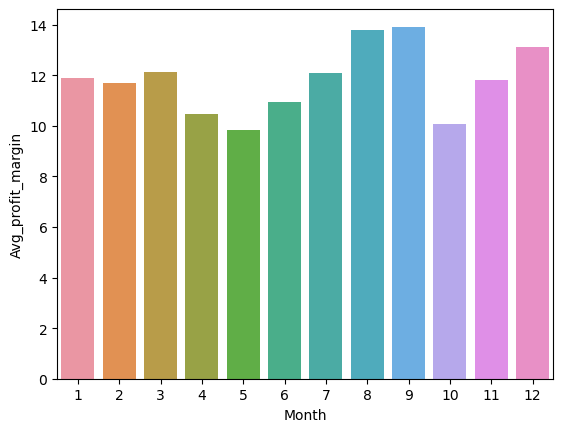

In [18]:
sns.barplot(x=query3['Month'],y=query3['Avg_profit_margin'],data=query3,errorbar=('ci',0))

#### INSIGHTS : 
This bar graph represents average profit margins by month. Septeber shows the highest average profit margin, followed by August and December. May exhibits the lowest average profit margin. Understanding these monthly variations in profit margins can help businesses evaluate pricing strategies, cost management, and revenue generation tactics throughout the year.

### 4. Categorical and Sub-Categorical Sales

In [19]:
query4 = "SELECT Category, round(sum(sales)) FROM Orders GROUP BY category ORDER BY COUNT(category) DESC"

mycursor.execute(query4)
myresult = mycursor.fetchall()

for x in myresult:
      print(x)

('Office Supplies', 719047.0)
('Furniture', 742000.0)
('Technology', 836154.0)


In [20]:
query4 = pd.DataFrame(myresult, columns = ['Category','Sales'])
query4

,Category,Sales
0,Office Supplies,719047.0
1,Furniture,742000.0
2,Technology,836154.0


Text(0.5, 1.0, 'Categorical Sales')

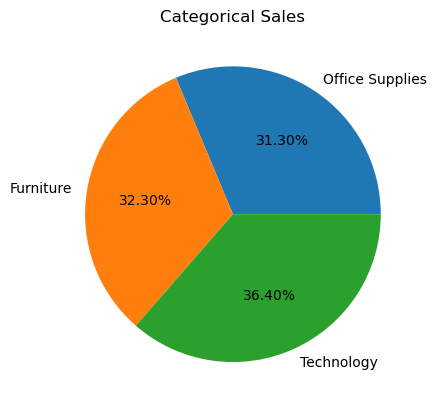

In [21]:
import matplotlib.pyplot as plt
plt.pie(query4['Sales'],labels = query4['Category'], explode=None, colors=None, autopct="%0.2f%%", shadow=False)
plt.title("Categorical Sales")

#### INSIGHTS :
The pie chart reveals distinct sales patterns across three main categories: Technology, Furniture, and Office Supplies. Technology emerges as the top-selling category, highlighting strong consumer demand for technological products. Furniture follows closely behind whereas Office Supplies, while still substantial, exhibit slightly lower sales, suggesting potential opportunities for targeted marketing or product innovation to enhance category performance.

In [22]:
query4_1 = "SELECT `Sub-Category`, round(sum(sales)) FROM Orders GROUP BY `sub-category` ORDER BY COUNT(`sub-category`) DESC"

mycursor.execute(query4_1)
myresult = mycursor.fetchall()

for x in myresult:
      print(x)

('Binders', 203413.0)
('Paper', 78479.0)
('Furnishings', 91705.0)
('Phones', 330007.0)
('Storage', 223844.0)
('Art', 27119.0)
('Accessories', 167380.0)
('Chairs', 328449.0)
('Appliances', 107532.0)
('Labels', 12486.0)
('Tables', 206966.0)
('Envelopes', 16476.0)
('Bookcases', 114880.0)
('Fasteners', 3024.0)
('Supplies', 46674.0)
('Machines', 189239.0)
('Copiers', 149528.0)


In [23]:
query4_1= pd.DataFrame(myresult, columns = ['Sub-Category','Sales'])
query4_1

,Sub-Category,Sales
0,Binders,203413.0
1,Paper,78479.0
2,Furnishings,91705.0
3,Phones,330007.0
4,Storage,223844.0
5,Art,27119.0
6,Accessories,167380.0
7,Chairs,328449.0
8,Appliances,107532.0
9,Labels,12486.0


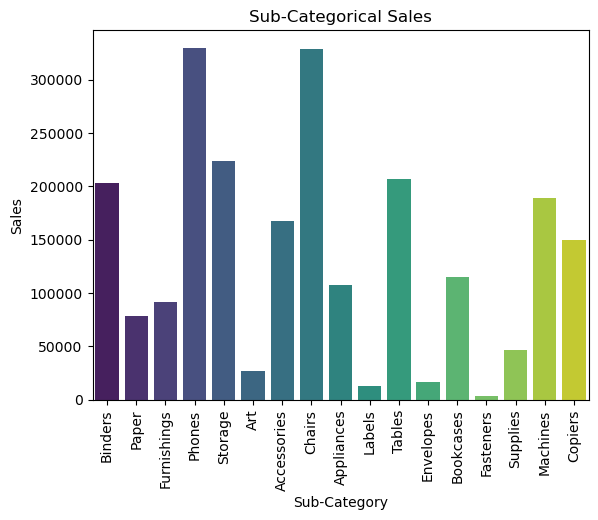

In [24]:
sns.barplot(x=query4_1["Sub-Category"],y=query4_1["Sales"],data=query4_1,estimator=np.median,errorbar=("ci",0),palette="viridis")
plt.title("Sub-Categorical Sales")
plt.xticks(rotation=90);

####  INSIGHTS :
Among the sub-categories, Fasteners exhibit the lowest sales, closely followed by Labels which perform slightly better. Conversely, Phones and Chairs emerge as the top-selling products according to the bar graph. Therefore, it's apparent that addressing the sales of Fasteners and Labels is necessary, while also capitalizing on marketing strategies to further boost sales of our best-selling products.

### 5. Categorical and Sub-Categorical Profits

In [35]:
query5="select category, round(sum(profit),2) as profit from orders group by category order by profit desc"
mycursor.execute(query5)
myresult = mycursor.fetchall()
for i in myresult:
    print(i)

('Technology', 145454.95)
('Office Supplies', 122490.8)
('Furniture', 18451.27)


In [32]:
query5=pd.DataFrame(myresult,columns=['Category','Profits'])
query5

,Category,Profits
0,Office Supplies,6026
1,Furniture,2121
2,Technology,1847


Text(0.5, 1.0, 'Categorical Profits')

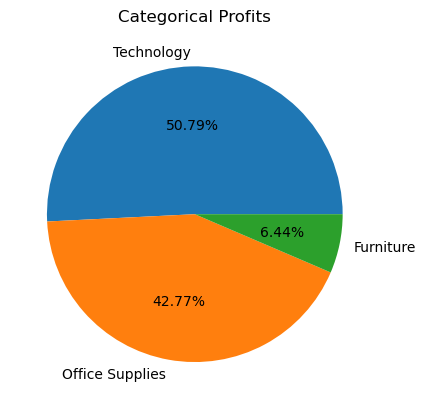

In [27]:
plt.pie(query5['Profits'],labels = query5['Category'], explode=None, colors=None, autopct="%0.2f%%", shadow=False)
plt.title('Categorical Profits')

#### INSIGHTS :
Over 50% of the profits are attributed to the Technology category, followed by Office Supplies with approximately 43%. Conversely, Furniture is generating the least profit. The pie chart helps to understand on the allocation of resources. It also shows that Furniture Category needs attention in order to increase to profits.

In [28]:
query5_1 = "select `Sub-Category`, round(sum(profit),2) as profit from Orders group by `Sub-Category` order by profit desc"

mycursor.execute(query5_1)
myresult = mycursor.fetchall()
for i in myresult:
    print(i)

('Copiers', 55617.82)
('Phones', 44515.73)
('Accessories', 41936.64)
('Paper', 34053.57)
('Binders', 30221.76)
('Chairs', 26590.17)
('Storage', 21278.83)
('Appliances', 18138.01)
('Furnishings', 13059.14)
('Envelopes', 6964.18)
('Art', 6527.79)
('Labels', 5546.25)
('Machines', 3384.76)
('Fasteners', 949.52)
('Supplies', -1189.1)
('Bookcases', -3472.56)
('Tables', -17725.48)


In [29]:
query5_1=pd.DataFrame(myresult,columns=['Sub-Category','Profits'])
query5_1

,Sub-Category,Profits
0,Copiers,55617.82
1,Phones,44515.73
2,Accessories,41936.64
3,Paper,34053.57
4,Binders,30221.76
5,Chairs,26590.17
6,Storage,21278.83
7,Appliances,18138.01
8,Furnishings,13059.14
9,Envelopes,6964.18


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Copiers'),
  Text(1, 0, 'Phones'),
  Text(2, 0, 'Accessories'),
  Text(3, 0, 'Paper'),
  Text(4, 0, 'Binders'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Storage'),
  Text(7, 0, 'Appliances'),
  Text(8, 0, 'Furnishings'),
  Text(9, 0, 'Envelopes'),
  Text(10, 0, 'Art'),
  Text(11, 0, 'Labels'),
  Text(12, 0, 'Machines'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Bookcases'),
  Text(16, 0, 'Tables')])

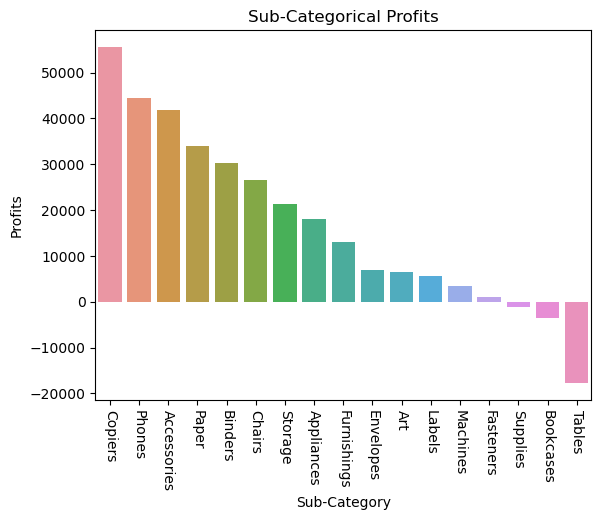

In [30]:
sns.barplot(x=query5_1["Sub-Category"],y=query5_1['Profits'],data=query5_1,errorbar=('ci',0))
plt.title('Sub-Categorical Profits')
plt.xticks(rotation=270)

#### INSIGHTS : 
The Sub-Categories generating significant profits include Copiers and Phones. However, Tables exhibit substantial losses, indicating a need for focused efforts to mitigate losses and potentially turn a profit. Additionally, several other Sub-Categories also indicate losses, suggesting the importance of striving to break even or improve profitability. Moreover, increasing sales of products within Sub-Categories with average profit margins can contribute to enhancing overall profitability.

### 6. Average Quantity from each Category and Sub-Category

In [40]:
query6="SELECT category, round(AVG(quantity),2) AS Avg_quantity FROM orders GROUP BY category;"
mycursor.execute(query6)
myresult = mycursor.fetchall()
for i in myresult:
    print(i)

('Furniture', Decimal('3.79'))
('Office Supplies', Decimal('3.80'))
('Technology', Decimal('3.76'))


In [41]:
query6=pd.DataFrame(myresult,columns=["Category","Avg_quantity"])
query6

,Category,Avg_quantity
0,Furniture,3.79
1,Office Supplies,3.80
2,Technology,3.76


Text(0.5, 1.0, 'Average Categorical Quantity')

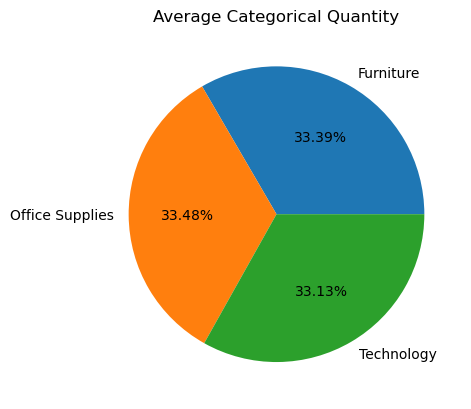

In [63]:
plt.pie(query6['Avg_quantity'],labels = query6['Category'], explode=None, colors=None, autopct="%0.2f%%", shadow=False)
plt.title('Average Categorical Quantity')

#### INSIGHTS :
Average Quantity is approximately equal in each category which is 33%. This consistency suggest stable purchasing patterns across diverse product types. Understanding the purchase of quantity helps to recognize the performance of the categories and to forecast inventory, production and marketing strategies.

In [43]:
query6_1="Select `sub-category`,round(avg(quantity),2) from orders group by `sub-category`"
mycursor.execute(query6_1)
myresult = mycursor.fetchall()
for i in myresult:
    print(i)

('Bookcases', Decimal('3.81'))
('Chairs', Decimal('3.82'))
('Labels', Decimal('3.85'))
('Tables', Decimal('3.89'))
('Storage', Decimal('3.73'))
('Furnishings', Decimal('3.72'))
('Art', Decimal('3.77'))
('Phones', Decimal('3.70'))
('Binders', Decimal('3.92'))
('Appliances', Decimal('3.71'))
('Paper', Decimal('3.78'))
('Accessories', Decimal('3.84'))
('Envelopes', Decimal('3.57'))
('Fasteners', Decimal('4.21'))
('Supplies', Decimal('3.41'))
('Machines', Decimal('3.83'))
('Copiers', Decimal('3.44'))


In [44]:
query6_1=pd.DataFrame(myresult,columns=['Sub-Category','Avg_quantity'])
query6_1

,Sub-Category,Avg_quantity
0,Bookcases,3.81
1,Chairs,3.82
2,Labels,3.85
3,Tables,3.89
4,Storage,3.73
5,Furnishings,3.72
6,Art,3.77
7,Phones,3.70
8,Binders,3.92
9,Appliances,3.71


Text(0.5, 1.0, 'Average Sub-Categorical Quantity')

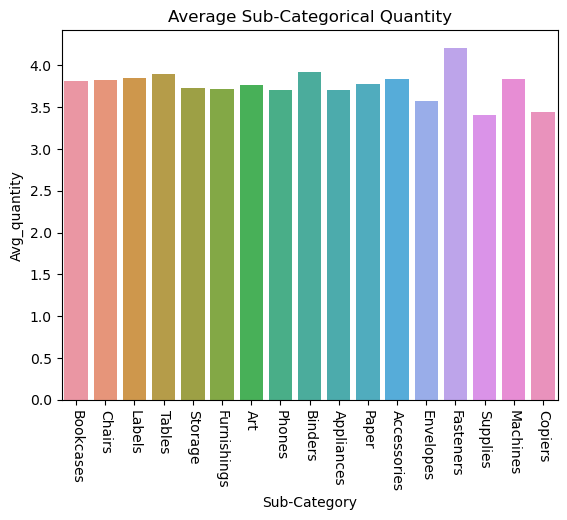

In [64]:
sns.barplot(x=query6_1['Sub-Category'],y=query6_1['Avg_quantity'],data=query6_1,errorbar=('ci',0))
plt.xticks(rotation=270)
plt.title('Average Sub-Categorical Quantity')

#### INSIGHTS :
This bar graph represents the average quantity of products sold for various sub-categories. Fasteners exhibit the highest average quantity sold which had lowest sales, followed closely by Binders and Tables. Supplies and Envelopes have the lowest average quantity sold. This knowledge can help businesses identify opportunities for upselling or cross-selling related products to maximize sales and customer satisfaction. Additionally, it can inform inventory management strategies to ensure sufficient stock levels for high-demand items while minimizing excess inventory for lower-demand products.

###  7. Top 5 most sold Products.

In [47]:
query7 = "select max(`Product Name`),count(`Product Name`),category from Orders group by `Product Name`,category  order by count(`Product Name`) desc limit 5 "
mycursor.execute(query7)
myresult = mycursor.fetchall()
for i in myresult:
    print(i)

('Staple envelope', 48, 'Office Supplies')
('Staples', 46, 'Office Supplies')
('Easy-staple paper', 46, 'Office Supplies')
('Avery Non-Stick Binders', 20, 'Office Supplies')
('Staples in misc. colors', 19, 'Office Supplies')


In [48]:
query7 = pd.DataFrame(myresult,columns=["Product Name", "No of products","Category"])
query7

,Product Name,No of products,Category
0,Staple envelope,48,Office Supplies
1,Staples,46,Office Supplies
2,Easy-staple paper,46,Office Supplies
3,Avery Non-Stick Binders,20,Office Supplies
4,Staples in misc. colors,19,Office Supplies


Text(0.5, 1.0, 'Top 5 Sold Products')

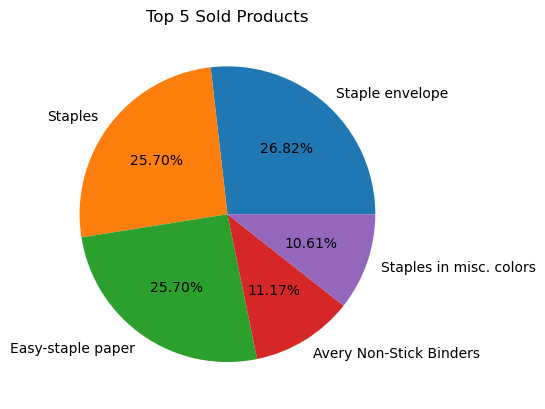

In [122]:
plt.pie(query7['No of products'],labels = query7['Product Name'], explode=None, colors=None, autopct="%0.2f%%", shadow=False)
plt.title('Top 5 Sold Products')

#### INSIGHTS :
The pie chart above displays the top 5 best-selling products, all of which belong to the Office Supplies category. Analyzing the top-selling products can provide valuable insights into customer preferences, market trends, and product performance, guiding businesses in optimizing inventory management, pricing strategies, and marketing efforts to capitalize on these popular items and maximize overall sales and profitability.

### 8. Region wise Sales and Profits

In [53]:
query8="select region, round(sum(sales),2) from orders group by region"
mycursor.execute(query8)
myresult=mycursor.fetchall()
for x in myresult:
    print(x)

('South', 391721.91)
('West', 725457.82)
('Central', 501239.89)
('East', 678781.24)


In [55]:
query8=pd.DataFrame(myresult,columns=['Region','Sales'])
query8

,Region,Sales
0,South,391721.91
1,West,725457.82
2,Central,501239.89
3,East,678781.24


<Axes: xlabel='Region', ylabel='Sales'>

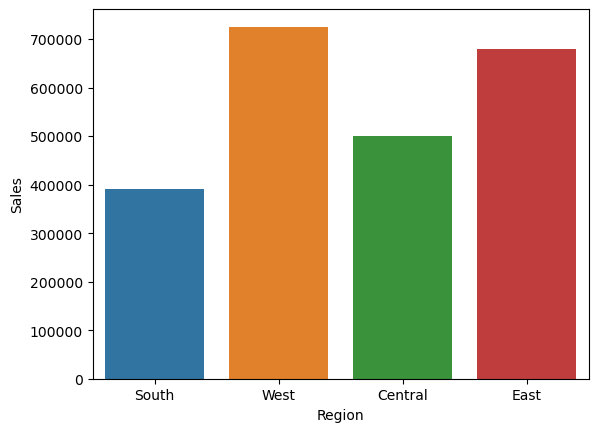

In [56]:
sns.barplot(x=query8["Region"],y=query8['Sales'],data=query8,errorbar=('ci',0))

#### INSIGHTS :
The sales data highlights regional disparities, with the West region leading in sales figures, closely followed by the East. These regions likely represent key markets for the business, warranting focused marketing and sales efforts. While the Central and South regions show lower sales, they still contribute to overall revenue, suggesting potential for targeted growth initiatives to maximize market share in these areas.

In [57]:
query8_1="select region, round(sum(profit),2) from orders group by region"
mycursor.execute(query8_1)
myresult=mycursor.fetchall()
for x in myresult:
    print(x)

('South', 46749.43)
('West', 108418.45)
('Central', 39706.36)
('East', 91522.78)


In [59]:
query8_1=pd.DataFrame(myresult,columns=['Region','Profits'])
query8_1

,Region,Profits
0,South,46749.43
1,West,108418.45
2,Central,39706.36
3,East,91522.78


<Axes: xlabel='Region', ylabel='Profits'>

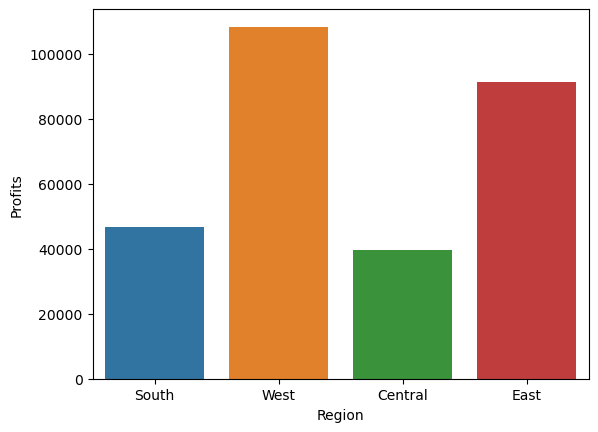

In [62]:
sns.barplot(x=query8_1["Region"],y=query8_1['Profits'],data=query8_1,errorbar=('ci',0))

#### INSIGHTS :
The West region leads in profitability, followed by the East, Central, and South regions. In the above bar graph it is noticeable that South region has higher profit compared to Central even though previously the sales of Central region were higher than that of South. It could be because of price variations through different regions. By understnding regional profits will assist business in optimizing operational efficiences as well as refining price strategies.

### 9. Number of Customers in Each Region

In [65]:
query9="SELECT Region, count(region) from orders group by region"
mycursor.execute(query9)
myresult=mycursor.fetchall()
for x in myresult:
    print(x)

('South', 1620)
('West', 3203)
('Central', 2323)
('East', 2848)


In [66]:
query9=pd.DataFrame(myresult,columns=['Region','No. of customers'])
query9

,Region,No. of customers
0,South,1620
1,West,3203
2,Central,2323
3,East,2848


<Axes: xlabel='Region', ylabel='No. of customers'>

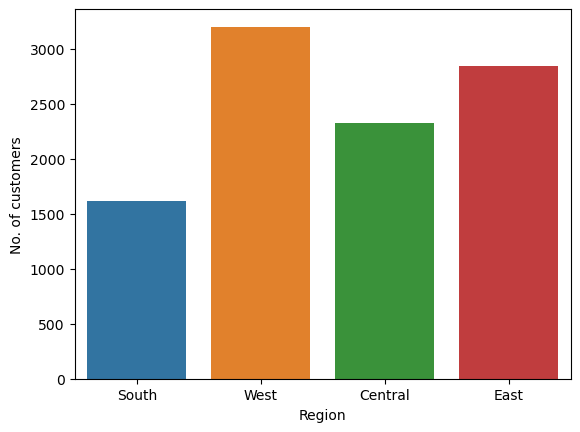

In [67]:
sns.barplot(x=query9["Region"],y=query9['No. of customers'],data=query9,errorbar=('ci',0))

#### INSIGHTS :
The West boasts the highest customer base, followed by the East with a strong customer base. Conversely, the Central region, despite a moderate customer count, struggles to translate it into profits. In contrast, the South region, with the fewest customers, faces challenges in achieving significant sales. These insights emphasize the need for tailored strategies to optimize customer service and resource allocation across regions.

### 10. Average profit margin % in each region

In [68]:
query10="SELECT Region, round(AVG((Profit / Sales) * 100),2) from orders group by region"
mycursor.execute(query10)
myresult=mycursor.fetchall()
for x in myresult:
    print(x)

('South', 16.35)
('West', 21.95)
('Central', -10.41)
('East', 16.72)


In [69]:
query10=pd.DataFrame(myresult,columns=['Region','Avg_profit%'])
query10

,Region,Avg_profit%
0,South,16.35
1,West,21.95
2,Central,-10.41
3,East,16.72


Text(0.5, 1.0, 'Average profit margin of each region')

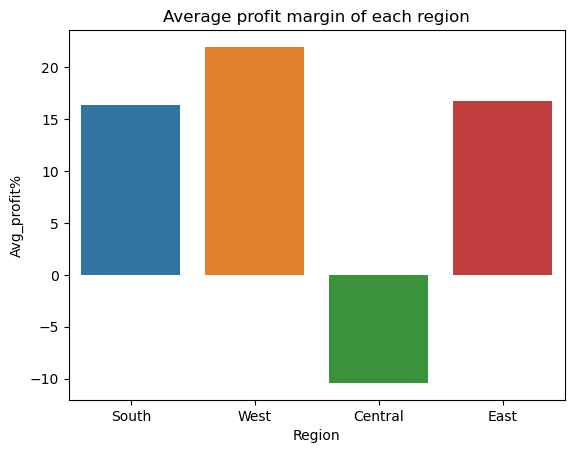

In [72]:
sns.barplot(x=query10['Region'],y=query10['Avg_profit%'],data=query10,errorbar=('ci',0))
plt.title('Average profit margin of each region')

#### INSIGHTS :
The West region leads with the highest average profit percentage, followed by the East and South regions. Conversely, the Central region shows a negative average profit percentage (average loss %), suggesting potential challenges in cost management or pricing strategies. This analysis not only aids in market understanding but also informs about strategic planning and risk management efforts.

### 11. See the distribution of sales in each state.

In [124]:
query11 = "SELECT state, COUNT(`order date`) AS num_transactions,  round(SUM(sales),2) AS total_sales FROM orders GROUP BY state ORDER BY total_sales DESC"
mycursor.execute(query11)
myresult=mycursor.fetchall()
for i in myresult:
    print(i)

('California', 2001, 457687.63)
('New York', 1128, 310876.27)
('Texas', 985, 170188.05)
('Washington', 506, 138641.27)
('Pennsylvania', 587, 116511.91)
('Florida', 383, 89473.71)
('Illinois', 492, 80166.1)
('Ohio', 469, 78258.14)
('Michigan', 255, 76269.61)
('Virginia', 224, 70636.72)
('North Carolina', 249, 55603.16)
('Indiana', 149, 53555.36)
('Georgia', 184, 49095.84)
('Kentucky', 139, 36591.75)
('New Jersey', 130, 35764.31)
('Arizona', 224, 35282.0)
('Wisconsin', 110, 32114.61)
('Colorado', 182, 32108.12)
('Tennessee', 183, 30661.87)
('Minnesota', 89, 29863.15)
('Massachusetts', 135, 28634.43)
('Delaware', 96, 27451.07)
('Maryland', 105, 23705.52)
('Rhode Island', 56, 22627.96)
('Missouri', 66, 22205.15)
('Oklahoma', 66, 19683.39)
('Alabama', 61, 19510.64)
('Oregon', 124, 17431.15)
('Nevada', 39, 16729.1)
('Connecticut', 82, 13384.36)
('Arkansas', 60, 11678.13)
('Utah', 53, 11220.06)
('Mississippi', 53, 10771.34)
('Louisiana', 42, 9217.03)
('Vermont', 11, 8929.37)
('South Carolina'

In [125]:
query11 = pd.DataFrame(myresult,columns=['State','Num_transactions','Sales'])
query11

,State,Num_transactions,Sales
0,California,2001,457687.63
1,New York,1128,310876.27
2,Texas,985,170188.05
3,Washington,506,138641.27
4,Pennsylvania,587,116511.91
5,Florida,383,89473.71
6,Illinois,492,80166.10
7,Ohio,469,78258.14
8,Michigan,255,76269.61
9,Virginia,224,70636.72


**The data presents the demand within each state as well as the economic output of each state in monetary value. States like California and New York exhibit both high number of transactions and sales revenue, indicating major economic centers. Meanwhile, states with lower sales revenue but high order volumes may offer opportunities for businesses to tap into untapped markets or optimize their pricing strategies for higher profitability.**

### 12. Find in which cities the profits are the highest and the lowest

In [76]:
query12="select round(sum(profit),2) , city from orders group by city order by sum(profit) desc limit 1;"

mycursor.execute(query12)
myresult=mycursor.fetchall()
for i in myresult:
    print(i)

(62036.98, 'New York City')


**New York City is the city in which Highest Profits are generated.**

In [78]:
query12_1="select round(sum(profit),2) , city from orders group by city order by sum(profit) limit 1;"
mycursor.execute(query12_1)
myresult=mycursor.fetchall()
for i in myresult:
    print(i)

(-13837.77, 'Philadelphia')


**Philadelphia is the city that has experienced the maximum loss.**

### 13. Which segment is generating Maximum Sales?

In [79]:
query13 = "select segment,round(sum(sales),2) from Orders group by segment order by sum(sales) desc"
mycursor.execute(query13)
myresult = mycursor.fetchall()

for i in myresult:
    print(i)

('Consumer', 1161401.34)
('Corporate', 706146.37)
('Home Office', 429653.15)


In [82]:
query13 = pd.DataFrame(myresult,columns = ["Segment","Sales"])
query13

,Segment,Sales
0,Consumer,1161401.34
1,Corporate,706146.37
2,Home Office,429653.15


Text(0.5, 1.0, 'Segment-Wise Sales')

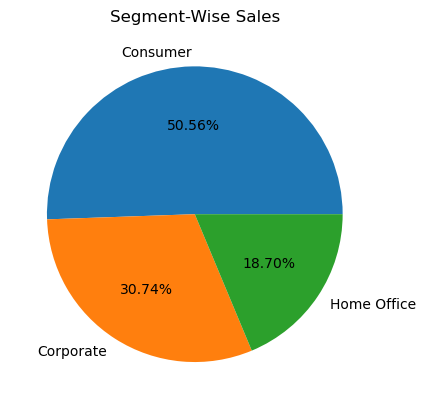

In [83]:
plt.pie(query13['Sales'],labels =query13['Segment'], explode=None, colors=None, autopct="%0.2f%%", shadow=False)
plt.title('Segment-Wise Sales')

#### INSIGHTS :
The pie chart displays sales figures for different segments. The Consumer segment leads with the highest sales, followed by Corporate and Home Office segments. Understanding sales distribution among segments helps businesses about product offerings to better serve the needs and preferences of each segment, ultimately maximizing revenue and customer satisfaction.

### 14. From which Segment maximum profits are produced?

In [89]:
query14="SELECT Segment, round(sum(profit),2) from orders group by segment"
mycursor.execute(query14)
myresult = mycursor.fetchall()

for i in myresult:
    print(i)

('Consumer', 134119.21)
('Corporate', 91979.13)
('Home Office', 60298.68)


In [91]:
query14 = pd.DataFrame(myresult,columns = ["Segment","Profits"])
query14

,Segment,Profits
0,Consumer,134119.21
1,Corporate,91979.13
2,Home Office,60298.68


Text(0.5, 1.0, 'Segment-Wise Profits')

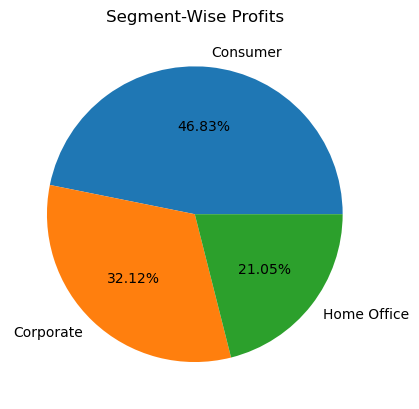

In [93]:
plt.pie(query14['Profits'],labels =query14['Segment'], explode=None, colors=None, autopct="%0.2f%%", shadow=False)
plt.title('Segment-Wise Profits')

#### INSIGHTS :
In the pie chart most of the weightage is given to Consumer segment and after that it is corporate segment which is showing good profits. Home Office is showing least profits among the segments. This analysis helps to understand about performance evalution of each segment and products offerings according to the patterns in customer behaviour.

### 15. Find the customers who have occured more than 25 times

In [94]:
query15 = "select count(`Customer Name`),`customer name` from Orders group by `customer name` having count(`Customer Name`) > 25"
mycursor.execute(query15)
myresult = mycursor.fetchall()
for i in myresult:
    print(i)

(34, 'Matt Abelman')
(28, 'Kunst Miller')
(30, 'Lena Cacioppo')
(28, 'Clay Ludtke')
(26, 'Steven Cartwright')
(32, 'Jonathan Doherty')
(29, 'Sally Hughsby')
(26, 'Cassandra Brandow')
(29, 'Ken Lonsdale')
(26, 'Laura Armstrong')
(28, 'Xylona Preis')
(31, 'Emily Phan')
(29, 'Greg Tran')
(31, 'Zuschuss Carroll')
(32, 'Chloris Kastensmidt')
(34, 'John Lee')
(31, 'Arthur Prichep')
(32, 'Seth Vernon')
(28, 'Chris Selesnick')
(26, 'Patrick Gardner')
(29, 'Brian Moss')
(26, 'Noel Staavos')
(27, 'Ben Ferrer')
(34, 'Paul Prost')
(27, 'Damala Kotsonis')
(28, 'Keith Dawkins')
(32, 'Edward Hooks')
(37, 'William Brown')
(29, 'Dean percer')


In [95]:
query15 = pd.DataFrame(myresult,columns = ["Occurence","Customer_Name"])
query15

,Occurence,Customer_Name
0,34,Matt Abelman
1,28,Kunst Miller
2,30,Lena Cacioppo
3,28,Clay Ludtke
4,26,Steven Cartwright
5,32,Jonathan Doherty
6,29,Sally Hughsby
7,26,Cassandra Brandow
8,29,Ken Lonsdale
9,26,Laura Armstrong


**The DataFrame above contains a list of customers who have appeared in the data more than 25 times indicating that they maybe recurring or loyal customers.**

### 16.Find the top 10 customers who bought Maximum Quantity.

In [96]:
query16 = "select `customer name`,sum(quantity) from Orders group by `customer name` order by sum(quantity) desc limit 10"
mycursor.execute(query16)
myresult = mycursor.fetchall()
for i in myresult:
    print (i)

('Jonathan Doherty', Decimal('150'))
('William Brown', Decimal('146'))
('John Lee', Decimal('143'))
('Paul Prost', Decimal('138'))
('Steven Cartwright', Decimal('133'))
('Emily Phan', Decimal('124'))
('Chloris Kastensmidt', Decimal('122'))
('Cassandra Brandow', Decimal('122'))
('Edward Hooks', Decimal('120'))
('Matt Abelman', Decimal('117'))


In [97]:
query16 = pd.DataFrame(myresult,columns=["Customer Name","Quantity"])
query16

,Customer Name,Quantity
0,Jonathan Doherty,150
1,William Brown,146
2,John Lee,143
3,Paul Prost,138
4,Steven Cartwright,133
5,Emily Phan,124
6,Chloris Kastensmidt,122
7,Cassandra Brandow,122
8,Edward Hooks,120
9,Matt Abelman,117


**The DataFrame above lists individuals who have purchased the maximum quantity of products.**

### 17. Which is the most used Shipping Mode?

In [98]:
query17 = "select `Ship Mode`, count(`Ship Mode`) from Orders group by `ship mode` order by count(`ship mode`) desc"

mycursor.execute(query17)
myresult = mycursor.fetchall()
for i in myresult:
    print(i)

('Standard Class', 5968)
('Second Class', 1945)
('First Class', 1538)
('Same Day', 543)


In [99]:
query17 = pd.DataFrame(myresult,columns = ["Ship Mode","Number of Orders"])
query17

,Ship Mode,Number of Orders
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


Text(0.5, 1.0, 'Shipping Mode')

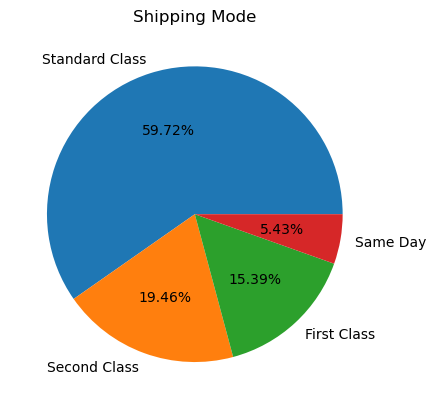

In [101]:
plt.pie(query17['Number of Orders'],labels = query17['Ship Mode'], explode=None, colors=None, autopct="%0.2f%%", shadow=False)
plt.title('Shipping Mode')

#### INSIGHTS :
Among the shipping modes, Same Day shows the lowest preference, followed by First Class, which is preferred abit more. Second Class is also a popular option. However, it's noteworthy that Standard Class emerges as the top choice for shipping mode. Based on this observation, it's reasonable to assume that Standard Class will continue to be the preferred shipping mode for future order deliveries.

### 18. Find which Products got Maximum Discounts.

In [102]:
query18 = "SELECT ROUND(SUM(discount)), `product name`, `sub-category` FROM Orders GROUP BY `product name` , `Sub-Category` ORDER BY SUM(Discount) DESC LIMIT 5"
mycursor.execute(query18)
myresult = mycursor.fetchall()
for i in myresult:
    print (i)

(7.0, 'Storex Dura Pro Binders', 'Binders')
(7.0, 'Avery Non-Stick Binders', 'Binders')
(6.0, 'GBC Instant Report Kit', 'Binders')
(6.0, 'Avery Self-Adhesive Photo Pockets for Polaroid Photos', 'Binders')
(6.0, 'GBC Standard Recycled Report Covers, Clear Plastic Sheets', 'Binders')


In [103]:
query18 = pd.DataFrame(myresult,columns=["Discount", "product name", "sub-category"])
query18

,Discount,product name,sub-category
0,7.0,Storex Dura Pro Binders,Binders
1,7.0,Avery Non-Stick Binders,Binders
2,6.0,GBC Instant Report Kit,Binders
3,6.0,Avery Self-Adhesive Photo Pockets for Polaroid...,Binders
4,6.0,"GBC Standard Recycled Report Covers, Clear Pla...",Binders


**The DataFrame above lists the top 5 products that received the maximum discount. It's noteworthy that all these products belong to the Binders sub-category.**

### 19. Which Sub-Category had the most products returned?

In [110]:
query19="SELECT COUNT(*) AS return_count,`sub-category`,category FROM returns JOIN Orders USING (`order id`) WHERE Returned = 'yes' GROUP BY `sub-category`,category ORDER BY return_count DESC"
mycursor.execute(query19)
myresult=mycursor.fetchall()
for i in myresult:
    print(i)

(137, 'Binders', 'Office Supplies')
(123, 'Paper', 'Office Supplies')
(77, 'Phones', 'Technology')
(72, 'Furnishings', 'Furniture')
(61, 'Accessories', 'Technology')
(57, 'Storage', 'Office Supplies')
(53, 'Chairs', 'Furniture')
(47, 'Art', 'Office Supplies')
(40, 'Appliances', 'Office Supplies')
(30, 'Tables', 'Furniture')
(21, 'Labels', 'Office Supplies')
(19, 'Fasteners', 'Office Supplies')
(16, 'Supplies', 'Office Supplies')
(16, 'Bookcases', 'Furniture')
(13, 'Machines', 'Technology')
(13, 'Envelopes', 'Office Supplies')
(5, 'Copiers', 'Technology')


In [112]:
query19=pd.DataFrame(myresult,columns=['Number of Returns','Sub-Category','Category'])
query19

,Number of Returns,Sub-Category,Category
0,137,Binders,Office Supplies
1,123,Paper,Office Supplies
2,77,Phones,Technology
3,72,Furnishings,Furniture
4,61,Accessories,Technology
5,57,Storage,Office Supplies
6,53,Chairs,Furniture
7,47,Art,Office Supplies
8,40,Appliances,Office Supplies
9,30,Tables,Furniture


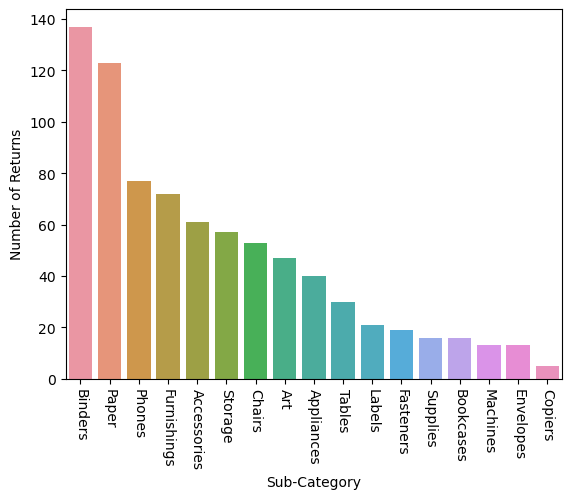

In [113]:
sns.barplot(x='Sub-Category',y='Number of Returns',data=query19,errorbar=('ci',0))
plt.xticks(rotation=270);

#### INSIGHTS :
The bar graph highlights the frequency of product returns across various sub-categories and categories. It's evident that office-related items, such as binders, paper, experience a significant number of returns compared to other sub-categories. This insight suggests potential areas for improvement in product quality, customer satisfaction, or fulfillment processes within the office supplies category as the most returns are from office supplies. Analyzing return patterns can help businesses identify underlying issues and implement strategies to reduce returns and enhance overall customer experience.

### 20. Which Manager generates how much Profits?

In [115]:
query20="select person,round(sum(profit)),Region from Orders join people using (region) group by person, Region order by sum(profit) desc"
mycursor.execute(query20)
myresult=mycursor.fetchall()
for i in myresult:
    print(i)

('Anna Andreadi', 108418.0, 'West')
('Chuck Magee', 91523.0, 'East')
('Cassandra Brandow', 46749.0, 'South')
('Kelly Williams', 39706.0, 'Central')


In [120]:
query20=pd.DataFrame(myresult,columns=["Person","Profit","Region"])
query20

,Person,Profit,Region
0,Anna Andreadi,108418.0,West
1,Chuck Magee,91523.0,East
2,Cassandra Brandow,46749.0,South
3,Kelly Williams,39706.0,Central


Text(0.5, 1.0, 'Profits by Managers ')

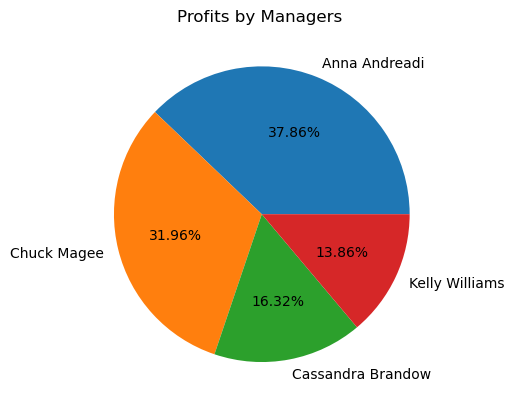

In [121]:
plt.pie(query20['Profit'],labels=query20['Person'], explode=None, colors=None, autopct="%0.2f%%", shadow=False)
plt.title('Profits by Managers ')

#### INSIGHTS :
Anna Andreadi, representing the West region, demonstrates the highest profits. Chuck Magee, operating in the East region, also contributes significantly to profits. Cassandra Brandow, hailing from the South region, generates modest profits. Meanwhile, Kelly Williams from the Central region shows comparatively lower profits.

### Conclusion :
* In Peak Periods we can take initiatives such as marketing and increase the sales as well as the profits
* We can take advantage of high sales in november to make more profits as the most sales occur in that month.
* There can be some changes made in pricing strategies or cost management so the avergae profit margin increases.
* Office supplies category has lowest sales so it should be targeted for marketing, Technology has highest sales in categories so the performance should be enhanced and in Furniture there could be soe innovations to inncrese overall sales.
*

### SUMMARY :

**From the above Data analysis we can summarize that:**
- Sales peak at year-end, except for October, with March showing early promise.
- Despite November's high sales, profits are low; December sees highest profits.
- August and September have highest profit margins; May is lowest.
- Technology leads in sales, Furniture follows; Office Supplies show lower sales but higher profits.
- Phones and Chairs lead in sales; Fasteners and Labels lag, suggesting need for improvement.
- Phones and Copiers yield highest profits; Tables, Bookcases, and Supplies show losses.
- Customers buy an average of 3.79 to 3.80 units per transaction.
- Fasteners, Binders, and Tables sell most but have low sales; Supplies and Envelopes sell least but have higher demand.
- Top 5 products sold are from Office Supplies.
- West leads in profits and sales, with most customers.
- East presents market expansion opportunity, with lower sales but good customer base.
- South region has lower sales but higher profits, likely due to higher margins.
- Central region needs optimization strategies for sales and profits, with moderate customer base.
- West has the highest profit margin %, followed by East and South, while Central is negative.
- Top sales: California and New York; lowest: West Virginia and North Dakota.
- Highest sales city: New York; lowest: Philadelphia.
- Consumer segment leads in sales and profits, followed by Corporate, with Home Office trailing.
- Shipping preference: Standard, Second class, First class, least preferred: Same Day.
- Maximum discounts on Binders sub-category products.
- Most returns: Binders and Paper; least: Copiers, Envelopes, and Machines.
- Highest profit earner: Anna Andreadi (West); lowest: Kelly Williams (Central).